In this project, we are going to use spacy for entity recognition on 200 Resume and experiment around various NLP tools for text analysis. The main purpose of this project is to help recruiters go throwing hundreds of applications within a few minutes. We have also added skills match feature so that hiring managers can follow a metric that will help them to decide whether they should move to the interview stage or not. We will be using two resume datasets; 
1) the first contains resume texts from https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset?select=data

2) The second is https://www.kaggle.com/code/gauravduttakiit/resume-screening-using-machine-learning/data

3) and also a data https://raw.githubusercontent.com/kingabzpro/jobzilla_ai/main/jz_skill_patterns.jsonl
that contains skills that we will use to create an entity ruler.

In [6]:
import pandas as pd
import os

#spacy
import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc

#gensim
import gensim
from gensim import corpora

#Visualization
from spacy import displacy
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
#pyLDAvis.enable_notebook()
import pyLDAvis.gensim_models
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt

#Data loading/ Data manipulation
import pandas as pd
import numpy as np
import jsonlines

#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

#warning
import warnings 
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
! pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 29.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=841c96df90db3154634a056403114a93a6eb30204ec994a1de5fd9f4bfcba6e4
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=f32eb0610dc7f42e7790ce71904a6f8509c213ee19ba66f4c45b8b04b7301002
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [5]:
! pip install jsonlines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Dataset

# Inside the CSV

The first dataset is a collection of 962 Resume Examples 
Resume : Contains the resume text only in string format.
Category : Category of the job the resume was used to apply.

In [7]:
data_path = "/content/UpdatedResumeDataSet.csv"

In [8]:
resume_df0 = pd.read_csv (os.path.join(data_path))

In [9]:
print (resume_df0.shape)
resume_df0.tail()

(962, 2)


,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


There are total 25 unique Job categories of the resume in dataset 1

In [10]:
unique_cat = resume_df0['Category'].unique().tolist()
print ('Number of categories : ', len(unique_cat))
print ('List of categories : \n', unique_cat)

Number of categories :  25
List of categories : 
 ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing', 'Mechanical Engineer', 'Sales', 'Health and fitness', 'Civil Engineer', 'Java Developer', 'Business Analyst', 'SAP Developer', 'Automation Testing', 'Electrical Engineering', 'Operations Manager', 'Python Developer', 'DevOps Engineer', 'Network Security Engineer', 'PMO', 'Database', 'Hadoop', 'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']


# Dataset2

A collection of 2400+ Resume Examples taken from livecareer.com for categorizing a given resume into any of the labels defined in the dataset: Resume Dataset.

Inside the CSV

1) ID: Unique identifier and file name for the respective pdf.

2) Resume_str : Contains the resume text only in string format.

3) Resume_html : Contains the resume data in html format as present while web scrapping.

4) Category : Category of the job the resume was used to apply.


In [11]:
data_path1 = "/content/Resume.csv"
resume_df1 = pd.read_csv (os.path.join(data_path1))


In [12]:
print (resume_df1.shape)
resume_df1.tail()

(2484, 4)


,ID,Resume_str,Resume_html,Category
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2483,37473139,STOREKEEPER II Professional Sum...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [13]:
resume_df1 ['Resume_str'][0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

There are total 24 unique Job categories of the resume in dataset 2

In [14]:
unique_cat = resume_df1['Category'].unique().tolist()
print ('Number of categories : ', len(unique_cat))
print ('List of categories : \n', unique_cat)

Number of categories :  24
List of categories : 
 ['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE', 'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE', 'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE', 'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT', 'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION']


In [15]:
# Dropping un-necessary fields in resume df 2
resume_df0.columns = resume_df0.columns.str.replace('Resume', 'Resume_str')
#resume_df0.rename(columns={"Resume": "Resume_str", })
resume_df1 = resume_df1.drop (columns=['Resume_html', 'ID'])
resume_df1.tail()

,Resume_str,Category
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION
2483,STOREKEEPER II Professional Sum...,AVIATION


In [16]:
resume_df0.head()

,Category,Resume_str
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [17]:
resume_df2 = resume_df0.append(resume_df1, ignore_index=True)
resume_df2.shape
resume_df2.head()

,Category,Resume_str
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [18]:
unique_cat = resume_df2['Category'].unique().tolist()
print ('Number of categories : ', len(unique_cat))
print ('List of categories : \n', unique_cat)

Number of categories :  48
List of categories : 
 ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing', 'Mechanical Engineer', 'Sales', 'Health and fitness', 'Civil Engineer', 'Java Developer', 'Business Analyst', 'SAP Developer', 'Automation Testing', 'Electrical Engineering', 'Operations Manager', 'Python Developer', 'DevOps Engineer', 'Network Security Engineer', 'PMO', 'Database', 'Hadoop', 'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE', 'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE', 'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE', 'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT', 'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION']


# Loading spaCy model

The jobzilla skill dataset is jsonl file containing different skills that can be used to create spaCy entity_ruler. The data set contains label and pattern-> diferent words used to descibe skills in various resume.

In [19]:
import en_core_web_sm
nlp = en_core_web_sm.load()

# Entity Ruler

To create an entity ruler we need to add a pipeline and then load the .jsonl file containing skills into ruler. As you can see we have successfully added a new pipeline entity_ruler. Entity ruler helps us add additional rules to highlight various categories within the text, such as skills and job description in our case.

In [23]:
skill_pattern_path = "/content/jz_skill_patterns.jsonl#"
#ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_pattern_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

# Skills Parsing

We will create two python functions to extract all the skills within a resume and create an array containing all the skills. Later we are going to apply this function to our dataset and create a new feature called skill. This will help us visualize trends and patterns within the dataset.

1) get_skills is going to extract skills from a single text.

2) unique_skills will remove duplicates.

In [24]:
def get_skills(text):
    doc = nlp(text)
    myset = []
    subset = []
    for ent in doc.ents:
        if "SKILL" in ent.label_ :
            #print ("ent.label_ ", ent.label_, "ent.text : ", ent.text)
            subset.append(ent.text)
    myset.append(subset)
    return subset


def unique_skills(x):
    return list(set(x))

In [25]:
def get_education(text):
    doc = nlp(text)
    myset = []
    subset = []
    for ent in doc.ents:
        if "EDUCATION" in ent.label_ :
            #print ("ent.label_ ", ent.label_, "ent.text : ", ent.text)
            subset.append(ent.text)
    myset.append(subset)
    return subset


def unique_education(x):
    return list(set(x))

In [26]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# Cleaning Resume Text


We are going to use nltk library to clean our dataset in a few steps:

1) We are going to use regex to remove hyperlinks, special characters, or punctuations.

2) Lowering text

3) Splitting text into array based on space

4) Lemmatizing text to its base form for normalizations

5) Removing English stopwords

6) Appending the results into an array.

In [27]:
def clean_a_text (text):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        text,
    )
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [
        lm.lemmatize(word)
        for word in review
        if not word in set(stopwords.words("english"))
    ]
    review = " ".join(review)
    return review

In [28]:
clean = []
for i in range(resume_df2.shape[0]):
    '''
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        resume_df2["Resume_str"].iloc[i],
    )
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [
        lm.lemmatize(word)
        for word in review
        if not word in set(stopwords.words("english"))
    ]'''
    cleaned_text = clean_a_text (resume_df2["Resume_str"].iloc[i])
    clean.append(cleaned_text)

creating Clean_Resume columns and adding cleaning Resume data.
creating skills columns, lowering text, and applying the get_skills function.
removing duplicates from skills columns.
Now we have cleaned the resume and skills columns.

In [29]:
resume_df2["Clean_Resume"] = clean
resume_df2["skills"] = resume_df2["Clean_Resume"].str.lower().apply(get_skills)
resume_df2["skills"] = resume_df2["skills"].apply(unique_skills)
resume_df2.head()

,Category,Resume_str,Clean_Resume,skills
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,"[deep learning, tableau, parse, flask, cassand..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 b e uit rgp...,"[python, github, machine learning, dimensional..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,"[deep learning, github, jupyter notebook, flas..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,"[deep learning, tableau, time series, support,..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,"[python, data structure, java, data science, d..."


In [30]:
resume_df2["education"] = resume_df2["Clean_Resume"].str.lower().apply(get_education)


In [31]:
resume_df2.head()

,Category,Resume_str,Clean_Resume,skills,education
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,"[deep learning, tableau, parse, flask, cassand...",[]
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 b e uit rgp...,"[python, github, machine learning, dimensional...",[]
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,"[deep learning, github, jupyter notebook, flas...",[]
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,"[deep learning, tableau, time series, support,...",[]
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,"[python, data structure, java, data science, d...",[]


In [32]:
resume_df2["education"] = resume_df2["education"].apply(unique_education)
resume_df2.head()

,Category,Resume_str,Clean_Resume,skills,education
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,"[deep learning, tableau, parse, flask, cassand...",[]
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 b e uit rgp...,"[python, github, machine learning, dimensional...",[]
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,"[deep learning, github, jupyter notebook, flas...",[]
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,"[deep learning, tableau, time series, support,...",[]
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,"[python, data structure, java, data science, d...",[]


In [33]:
resume_df2["Clean_Resume"][0]

'skill programming language python panda numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch d3 j dc j plotly kibana matplotlib ggplot tableau others regular expression html cs angular 6 logstash kafka python flask git docker computer vision open cv understanding deep learning education detail data science assurance associate data science assurance associate ernst young llp skill detail javascript exprience 24 month jquery exprience 24 month python exprience 24 monthscompany detail company ernst young llp description fraud investigation dispute service assurance technology assisted review tar technology assisted review assist accelerating review process run analytics generate 

In [34]:
resume_df2["skills"][0]

['deep learning',
 'tableau',
 'parse',
 'flask',
 'cassandra',
 'hbase',
 'monitoring',
 'bot',
 'time series',
 'javascript',
 'analytics',
 'database',
 'visualization',
 'logstash',
 'natural language processing',
 'file format',
 'cluster analysis',
 'decision tree',
 'kafka',
 'sentiment analysis',
 'programming language',
 'git',
 'jquery',
 'machine learning',
 'computer vision',
 'security',
 'predictive coding',
 'plotly',
 'elasticsearch',
 'data science',
 'regular expression',
 'numpy',
 'accounting',
 'python',
 'docker',
 'dimensionality reduction',
 'random forest',
 'bootstrap',
 'mysql',
 'scikit learn']

# Jobs Distribution

As we can see our samples contain a variety of job categories. HR, Business development, and INFORMATION-TECHNOLOGY are the top categories.

In [35]:
fig = px.histogram(
    resume_df2, x="Category", title="Distribution of Jobs Categories"
).update_xaxes(categoryorder="total descending")
fig.show()

In [36]:
Job_Cat = resume_df2["Category"].unique()
print (Job_Cat)
Job_Cat = np.append(Job_Cat, "ALL")
Job_Category = 'HR'

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing' 'DESIGNER'
 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE' 'BUSINESS-DEVELOPMENT'
 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES' 'CONSULTANT'
 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL' 'ENGINEERING'
 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING' 'ARTS'
 'AVIATION']


In [37]:
Total_skills = []
if Job_Category != "ALL":
    fltr = resume_df2[resume_df2["Category"] == Job_Category]["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)
else:
    fltr = resume_df2["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)


As we can observe HR job category skills distributions.

Top Skills are:
    > Business
    > Database
    > Schedule

In [38]:
fig = px.histogram(
    x=Total_skills,
    labels={"x": "Skills"},
    title=f"{Job_Category} Distribution of Skills",
).update_xaxes(categoryorder="total descending")
fig.show()

As we can observe Data Science job category skills distributions.

Top Skills are:
    > Python
    > Machine Learning
    > Engineering
    > Database

In [39]:
Job_Category= 'Data Science'
Total_skills = []
if Job_Category != "ALL":
    fltr = resume_df2[resume_df2["Category"] == Job_Category]["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)
else:
    fltr = resume_df2["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)

In [40]:
fig = px.histogram(
    x=Total_skills,
    labels={"x": "Skills"},
    title=f"{Job_Category} Distribution of Skills",
).update_xaxes(categoryorder="total descending")
fig.show()

# Most used words
In this part, we are going to display the most used words in the Resume filter by job category. In Information technology, the most words used are system, network, and database. We can also discover more patterns by exploring the word cloud below.

Text(0.5, 1.0, 'Most Used Words in Data Science Resume')

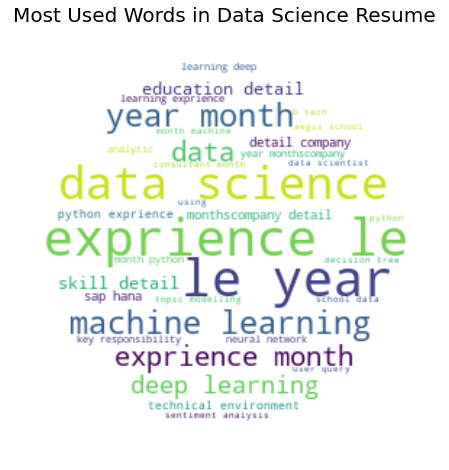

In [41]:
text = ""
for i in resume_df2[resume_df2["Category"] == Job_Category]["Clean_Resume"].values:
    text += i + " "

plt.figure(figsize=(8, 8))

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(
    width=800,
    height=800,
    background_color="white",
    min_font_size=6,
    repeat=True,
    mask=mask,
)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(f"Most Used Words in {Job_Category} Resume", fontsize=20)

# Entity Recognition
We can also display various entities within our raw text by using spaCy displacy.render. I am in love with this function as it is an amazing way to look at your entire document and discover SKILL or GEP within your Resume.

In [42]:
sent = nlp(resume_df2["Resume_str"].iloc[0])
displacy.render(sent, style="ent", jupyter=True)

# Dependency Parsing
We can also visualize dependencies by just changing style to dep as shown below. We have also limited words to 10 which includes space too. Limiting the words will make it visualize the small chunk of data and if you want to see the dependency, you can remove the filter.

In [43]:
displacy.render(sent[0:10], style="dep", jupyter=True, options={"distance": 90})

# Custom Entity Recognition
We have added a new entity called SKILL and is displayed in gray color. I was not impressed by colors and I also wanted to add another entity called Job Description so I started experimenting with various parameters within displace.

Adding Job-Category into entity ruler.
Adding custom colors to all categories.
Adding gradient colors to SKILL and Job-Category
You can see the result below as the new highlighted texts look beautiful.

In [44]:
patterns = resume_df2.Category.unique()
for a in patterns:
    ruler.add_patterns([{"label": "Job-Category", "pattern": a}])

In [45]:
# options=[{"ents": "Job-Category", "colors": "#ff3232"},{"ents": "SKILL", "colors": "#56c426"}]
colors = {
    "Job-Category": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "ORDINAL": "#674ea7",
    "PRODUCT": "#f9cb9c",
}
options = {
    "ents": [
        "Job-Category",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "ORDINAL",
        "PRODUCT",
    ],
    "colors": colors,
}
sent = nlp(resume_df2["Resume_str"].iloc[5])
displacy.render(sent, style="ent", jupyter=True, options=options)

# Resume Anlaysis
In this part, I am allowing users to copy&paste their resumes and see the results.

As we can see my I have added my Resume and the results are amazing. The model has successfully highlighted all the skills.

In [46]:
input_resume = "Abid Ali Awan Data Scientist I am a certified data scientist professional, who loves building machine learning models and blogs about the latest AI technologies. I am currently testing AI Products at PEC-PITC, which later gets approved for human trials. abidaliawan@tutamail.com +923456855126 Islamabad, Pakistan abidaliawan.me WORK EXPERIENCE Data Scientist Pakistan Innovation and Testing Center - PEC 04/2021 - Present, Islamabad, Pakistan Redesigned data of engineers that were mostly scattered and unavailable. Designed dashboard and data analysis report to help higher management make better decisions. Accessibility of key information has created a new culture of making data-driven decisions. Contact: Ali Raza Asif - darkslayerraza10@gmail.com Data Scientist Freelancing/Kaggle 11/2020 - Present, Islamabad, Pakistan Engineered a healthcare system. Used machine learning to detect some of the common decisions. The project has paved the way for others to use new techniques to get better results. Participated in Kaggle machine learning competitions. Learned new techniques to get a better score and finally got to 1 percent rank. Researcher / Event Organizer CREDIT 02/2017 - 07/2017, Kuala Lumpur, Malaysia Marketing for newly build research lab. Organized technical events and successfully invited the multiple company's CEO for talks. Reduced the gap between industries and educational institutes. Research on new development in the IoT sector. Created research proposal for funding. Investigated the new communication protocol for IoT devices. Contact: Dr. Tan Chye Cheah - dr.chyecheah.t@apu.edu.my EDUCATION MSc in Technology Management Staffordshire University 11/2015 - 04/2017, Postgraduate with Distinction Challenges in Implementing IoT-enabled Smart cities in Malaysia. Bachelors Electrical Telecommunication Engineering COMSATS Institute of Information Technology, Islamabad 08/2010 - 01/2014, CGPA: 3.09 Networking Satellite communications Programming/ Matlab Telecommunication Engineering SKILLS Designing Leadership Media/Marketing R/Python SQL Tableau NLP Data Analysis Machine learning Deep learning Webapp/Cloud Feature Engineering Ensembling Time Series Technology Management ACHIEVEMENTS 98th Hungry Geese Simulation Competition (08/2021) 2nd in Covid-19 vaccinations around the world (07/2021) 8th in Automatic Speech Recognition in WOLOF (06/2021) Top 10 in WiDS Datathon. (03/2021) 40th / 622 in MagNet: Model the Geomagnetic Field Hosted by NOAA (02/2021) 18th in Rock, Paper, Scissors/Designing AI Agent Competition. (02/2021) PROJECTS Goodreads Profile Analysis WebApp (09/2021) Data Analysis Web Scraping XLM Interactive Visualization Contributed in orchest.io (08/2021) Testing and Debuging Technical Article Proposing new was to Improve ML pipelines World Vaccine Update System (06/2021) Used sqlite3 for database Automated system for daily update the Kaggle DB and Analysis Interactive dashboard mRNA-Vaccine-Degradation-Prediction (06/2021) Explore our dataset and then preprocessed sequence, structure, and predicted loop type features Train deep learning GRU model Trip Advisor Data Analysis/ML (04/2021) Preprocessing Data, Exploratory Data analysis, Word clouds. Feature Engineering, Text processing. BiLSTM Model for predicting rating, evaluation, model performance. Jane Street Market Prediction (03/2021) EDA, Feature Engineering, experimenting with hyperparameters. Ensembling: Resnet, NN Embeddings, TF Simple NN model. Using simple MLP pytorch model. Achievements/Tasks Achievements/Tasks Achievements/Tasks Thesis Courses"

# Custom Entity Recognition
In our case, we have added a new entity called SKILL and is displayed in Green color. I was not impressed by colors and I also wanted to add another entity called Job Description so I started experimenting with various parameters within displace.

Adding Job-Category into entity ruler.
Adding custom colors to all categories.
Adding gradient colors to SKILL and Job-Category
You can see the result below as the new highlighted texts look beautiful.

In [47]:
sent2 = nlp(input_resume)
displacy.render(sent2, style="ent", jupyter=True, options=options)

In [48]:
 input_skills = 'Data Science,Data Analysis,Database,SQL,Machine learning'

In [49]:
req_skills = input_skills.lower().split(",")
resume_skills = unique_skills(get_skills(input_resume.lower()))
score = 0
for x in req_skills:
    if x in resume_skills:
        score += 1
req_skills_len = len(req_skills)
match = round(score / req_skills_len * 100, 1)

print(f"The current Resume is {match}% matched to your requirements")

The current Resume is 60.0% matched to your requirements


In [50]:
print(resume_skills)

['deep learning', 'tableau', 'pytorch', 'time series', 'database', 'visualization', 'data analysis', 'communications', 'nlp', 'text processing', 'testing', 'ai', 'marketing', 'machine learning', 'engineering', 'speech recognition', 'exploratory data analysis', 'ml', 'simulation', 'python']


In [ ]:
'''
# importing required modules 
import PyPDF2 
    
# creating a pdf file object 
pdfFileObj = open('dataset/data/HR/10399912.pdf', 'rb') 
    
# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
    
# printing number of pages in pdf file 
print(pdfReader.numPages) 
    
# creating a page object 
pageObj = pdfReader.getPage(0) 
    
# extracting text from page 
print("CONTENT : " , pageObj.extractText()) 
    
# closing the pdf file object 
pdfFileObj.close() 
'''

'\n# importing required modules \nimport PyPDF2 \n    \n# creating a pdf file object \npdfFileObj = open(\'dataset/data/HR/10399912.pdf\', \'rb\') \n    \n# creating a pdf reader object \npdfReader = PyPDF2.PdfFileReader(pdfFileObj) \n    \n# printing number of pages in pdf file \nprint(pdfReader.numPages) \n    \n# creating a page object \npageObj = pdfReader.getPage(0) \n    \n# extracting text from page \nprint("CONTENT : " , pageObj.extractText()) \n    \n# closing the pdf file object \npdfFileObj.close() \n'

In [53]:
import slate3k as slate

#with open("dataset/data/HR/10399912.pdf",'rb') as f:
#    extracted_text = slate.PDF(f)
#print(extracted_text)

In [52]:
! pip install slate3k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 8.0 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 


In [54]:
def list_full_paths(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory)]

In [55]:
!unzip /content/Data1.zip

Archive:  /content/Data1.zip
   creating: Data1/ENGINEERING/
  inflating: Data1/ENGINEERING/10030015.pdf  
  inflating: Data1/ENGINEERING/10219099.pdf  
  inflating: Data1/ENGINEERING/10624813.pdf  
  inflating: Data1/ENGINEERING/10712803.pdf  
  inflating: Data1/ENGINEERING/10985403.pdf  
  inflating: Data1/ENGINEERING/11890896.pdf  
  inflating: Data1/ENGINEERING/11981094.pdf  
  inflating: Data1/ENGINEERING/12011623.pdf  
  inflating: Data1/ENGINEERING/12022566.pdf  
  inflating: Data1/ENGINEERING/12472574.pdf  
  inflating: Data1/ENGINEERING/12488356.pdf  
  inflating: Data1/ENGINEERING/12518008.pdf  
  inflating: Data1/ENGINEERING/12748557.pdf  
  inflating: Data1/ENGINEERING/13149176.pdf  
  inflating: Data1/ENGINEERING/13264796.pdf  
  inflating: Data1/ENGINEERING/14049846.pdf  
  inflating: Data1/ENGINEERING/14206561.pdf  
  inflating: Data1/ENGINEERING/14554542.pdf  
  inflating: Data1/ENGINEERING/15139979.pdf  
  inflating: Data1/ENGINEERING/15601399.pdf  
  inflating: Data1/

In [56]:
top_n = 3
job_category =  'ENGINEERING' 
#job_category = 'HR'
test_job_folder = '/content/Data1'
test_resume_path = os.path.join (test_job_folder, job_category)
required_education = 'master, engineering, computer science, graduate, post graduate'
required_skills = 'Data Science,Data Analysis,Database,\
SQL,Machine learning,Python,tableau'
#required_skills = 'business, database, schedule'
resume_files_list = list_full_paths (test_resume_path)
print ("Total num of test resumes : ", len (resume_files_list))

Total num of test resumes :  118


In [57]:
resume_texts = []
match_score = []
skill_match_score = []
all_resume_skills = []
edu_match_score = []
all_resume_edu = []
for resume_file in resume_files_list:
    f = open(resume_file,'rb')
    extracted_text = slate.PDF(f)
    extracted_text = str(extracted_text)
    cleaned_text = clean_a_text (extracted_text)
    resume_texts.append (cleaned_text)
    req_skills = required_skills.lower().split(",")
    resume_skills = unique_skills(get_skills(cleaned_text.lower()))
    all_resume_skills.append (resume_skills)
    req_edu = required_education.lower().split(",")
    resume_edu = unique_skills(get_education(cleaned_text.lower()))
    all_resume_edu.append (resume_skills)
    
    #print (resume_skills)
    score = 0
    for x in req_skills:
        if x in resume_skills:
            score += 1
    edu_score = 0       
    for x in req_edu:
        if x in resume_edu:
            edu_score += 1
            
    req_skills_len = len(req_skills)
    match = round(score / req_skills_len * 100, 1)
    skill_match_score.append (match)
    
    req_edu_len = len(req_edu)
    edu_match = round(edu_score / req_edu_len * 100, 1)
    edu_match_score.append (edu_match)
    
    match_score.append (match+edu_match)
    print(f"The current-resume {resume_file} is {match}% matched to required skills and {edu_match}% with education")
    

The current-resume /content/Data1/ENGINEERING/25919149.pdf is 0.0% matched to required skills and 0.0% with education
The current-resume /content/Data1/ENGINEERING/82246962.pdf is 14.3% matched to required skills and 0.0% with education
The current-resume /content/Data1/ENGINEERING/23497307.pdf is 14.3% matched to required skills and 0.0% with education
The current-resume /content/Data1/ENGINEERING/38314236.pdf is 0.0% matched to required skills and 0.0% with education
The current-resume /content/Data1/ENGINEERING/35389360.pdf is 14.3% matched to required skills and 0.0% with education
The current-resume /content/Data1/ENGINEERING/55595908.pdf is 0.0% matched to required skills and 0.0% with education
The current-resume /content/Data1/ENGINEERING/30097175.pdf is 0.0% matched to required skills and 0.0% with education
The current-resume /content/Data1/ENGINEERING/36149549.pdf is 0.0% matched to required skills and 0.0% with education
The current-resume /content/Data1/ENGINEERING/2715246

In [58]:
match_score = np.array(match_score)
sort_index_match_score = np.argsort(match_score)
#print(sort_index_match_score)

if top_n < len (resume_files_list):
    top_n_index = list(sort_index_match_score [-top_n : ])
    top_n_index.reverse()
    for i, idx in enumerate(top_n_index):
        print ("\n\nTop %d resume is %s with match score : %f "%(i+1, resume_files_list[idx], match_score[idx] ))
        print ("\n\tSkillset of this resume is : \n\t\t", all_resume_skills[idx])
else:
    for i, idx in enumerate(sort_index_match_score):
        print ("\n\nTop %d resume is %s with match score : %f "%(i+1, resume_files_list[idx], match_score[idx] ))
        print ("\n\tSkillset of this resume is : ", all_resume_skills[idx])



Top 1 resume is /content/Data1/ENGINEERING/12011623.pdf with match score : 71.400000 

	Skillset of this resume is : 
		 ['tableau', 'data mining', 'support', 'analytics', 'material', 'algorithm', 'logistic regression', 'business', 'visualization', 'database', 'data analysis', 'database design', 'testing', 'segmentation', 'decision tree', 'data warehouse', 'schedule', 'asp net', 'machine learning', 'software', 'engineering', 'design', 'shrinkage', 'oracle', 'python', 'random forest', 'collaboration', 'knowledge base']


Top 2 resume is /content/Data1/ENGINEERING/19396040.pdf with match score : 42.900000 

	Skillset of this resume is : 
		 ['python', 'documentation', 'robot', 'engineering', 'industrial engineering', 'java', 'image quality', 'schedule', 'visual basic', 'material', 'database', 'data analysis']


Top 3 resume is /content/Data1/ENGINEERING/32985311.pdf with match score : 28.600000 

	Skillset of this resume is : 
		 ['tableau', 'python', 'testing', 'trello', 'software', '

In [59]:
sent2 = nlp(resume_texts[top_n_index[0]])
displacy.render(sent2, style="ent", jupyter=True, options=options)

In [60]:

docs = resume_df2["Clean_Resume"].values
dictionary = corpora.Dictionary(d.split() for d in docs)
bow = [dictionary.doc2bow(d.split()) for d in docs]
lda = gensim.models.ldamodel.LdaModel
num_topics = 4
ldamodel = lda(
    bow, 
    num_topics=num_topics, 
    id2word=dictionary, 
    passes=50, 
    minimum_probability=0
)
ldamodel.print_topics(num_topics=num_topics)


[(0,
  '0.015*"project" + 0.012*"system" + 0.008*"management" + 0.007*"state" + 0.007*"company" + 0.007*"city" + 0.007*"engineering" + 0.006*"construction" + 0.006*"design" + 0.006*"name"'),
 (1,
  '0.015*"customer" + 0.012*"company" + 0.011*"state" + 0.009*"city" + 0.009*"management" + 0.009*"service" + 0.008*"name" + 0.007*"sale" + 0.007*"financial" + 0.006*"account"'),
 (2,
  '0.013*"state" + 0.011*"city" + 0.011*"company" + 0.008*"name" + 0.008*"marketing" + 0.008*"sale" + 0.006*"business" + 0.006*"management" + 0.006*"development" + 0.006*"student"'),
 (3,
  '0.013*"project" + 0.012*"exprience" + 0.011*"month" + 0.011*"data" + 0.010*"description" + 0.010*"detail" + 0.009*"company" + 0.008*"application" + 0.008*"system" + 0.008*"database"')]